# Прогноз вероятности оттока для клиентов сети фитнес-центров «Культурист-датасаентист» 

**Краткое описание проекта**

Заказчик исследования — cеть фитнес-центров «Культурист-датасаентист».
Необходимо cпрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента.

**Цель проекта**

Изучить данные, научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента, сформировать типичные портреты клиентов, проанализировать основные признаки, наиболее сильно влияющие на отток, сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.

**Описание данных**

В файле gym_churn.csv данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

Набор данных включает следующие поля:
    
    Данные клиента за предыдущий до проверки факта оттока месяц:
    
    -'gender' — пол;
    -'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    -'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    -'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промокод от знакомого при оплате первого абонемента);
    -'Phone' — наличие контактного телефона;
     -'Age' — возраст;
    -'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    
    Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    
    -'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    -'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    -'Group_visits' — факт посещения групповых занятий;
    -'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    -'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    -'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    -'Churn' — факт оттока в текущем месяце.

   
**План работы**

1. Открыть файл с данными.
2. Провести исследовательский анализ данных (EDA).
3. Построить модель прогнозирования оттока клиентов.
4. Сделать кластеризацию клиентов.
5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами.

## Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
import warnings

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')# прочитаем файл и сохраним его в data

In [3]:
data.head()# посмотрим на датасет, выведем первые 5 строк

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


В датасете мы видим есть много бинарных признаков, но также есть и количественные. Пока не совсем видно есть ли в данных пропуски, дубликаты, проверим это дальше и проведем исследовательский анализ данных.

## Исследовательский анализ данных (EDA)

In [4]:
data.info()# выведем основную информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data.duplicated().sum()# проверим данные на дубликаты

0

Дубликатов и пропусков в данных нет.

In [6]:
data.describe().T# посмотрим на основные статистические характеристики данных

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


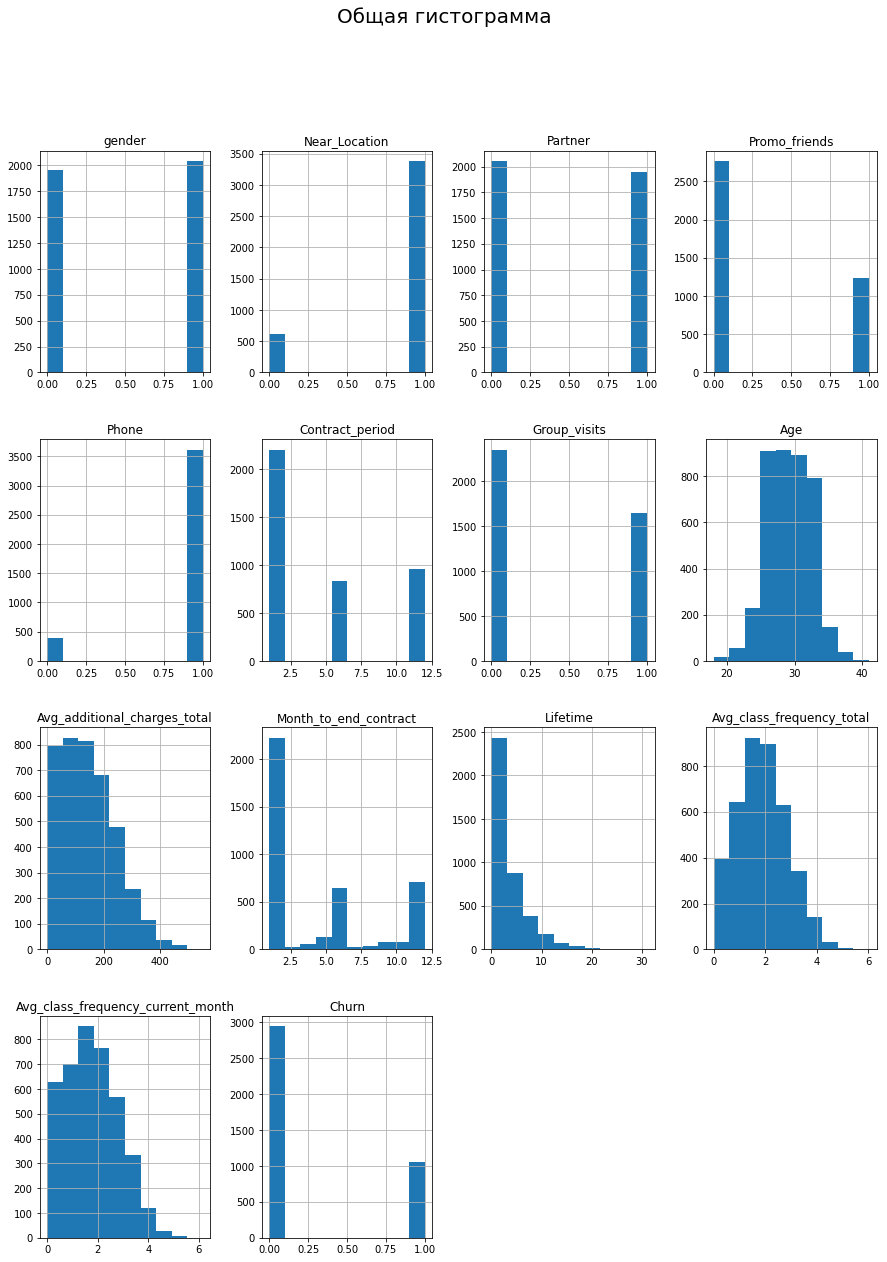

In [7]:
# выведем общую гистограмму по всему датасету
data.hist(figsize=(15,20))
plt.suptitle('Общая гистограмма', fontsize=20)
plt.show();

По общей гистограмме видно, что данные распределены нормально. Также по гистограмме и по статистическим характеристикам можно описать всех клиентов сети фитнес-центра. По полу и наличию/отсутствию сотрудника компании-партнера особых различий нет, в основном в зал ходят те, кто живет или работает рядом с ним, по промокоду «приведи друга» приходит меньше людей, чем без промокода, меньше чем у 500 людей из 4000 нет информации о контактном телефоне, по возрасту клиенты в основном 26-32 лет, больше всего клиентов с месячным абонементом, на групповые занятия ходит меньше людей, чем не ходит, большая часть клиентов платит суммарно за другие услуги фитнес-центра в среднем 147, также в среднем в спортзал клиенты ходят 2 раза в неделю, ушедших клиентов в этом месяце чуть больше 1000. Новых клиентов больше всего среди всех.

In [8]:
data.groupby('Churn').agg('mean').style.format('{:.3f}')# посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045


In [9]:
data_remained = data[data['Churn'] == 0]# сохраним в переменную данные об оставшихся клиентах

In [10]:
data_departed = data[data['Churn'] == 1]# сохраним в переменную данные об ушедших клиентах

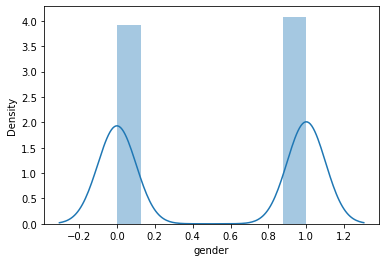

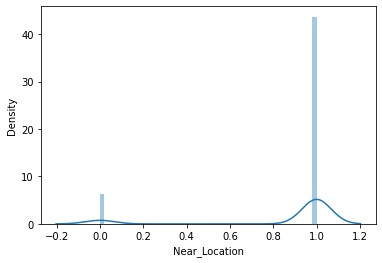

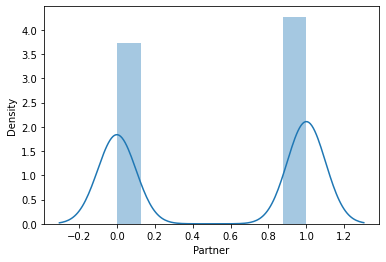

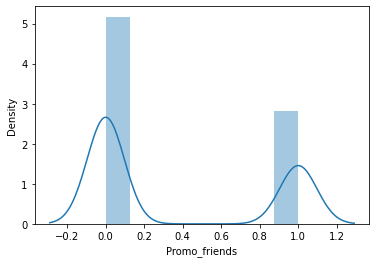

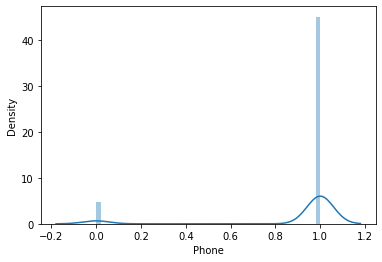

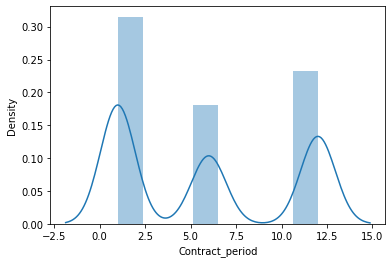

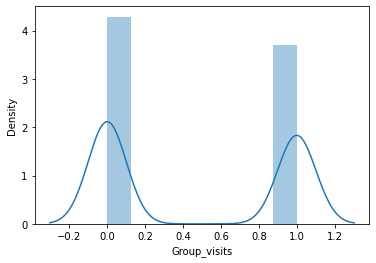

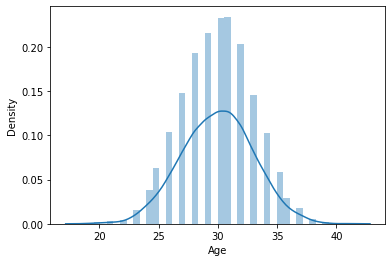

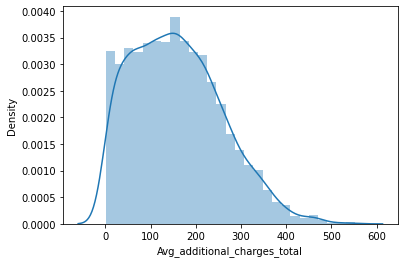

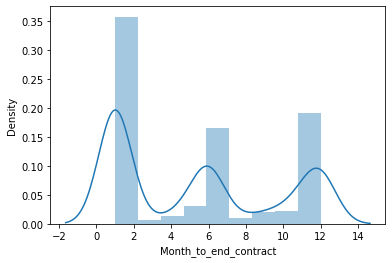

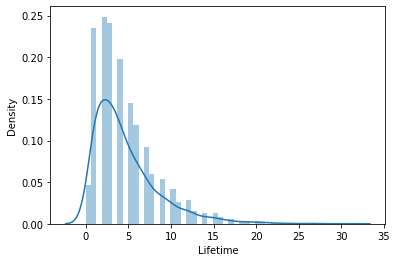

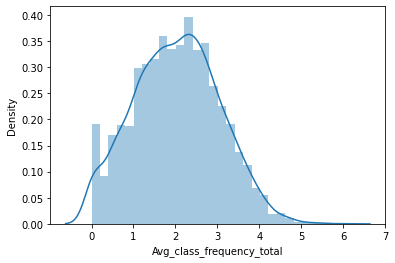

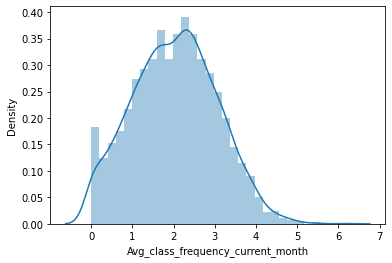

In [11]:
# построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и для тех, кто остался
# для тех, кто остался
warnings.filterwarnings('ignore')
for col in data_remained.drop('Churn', axis = 1).columns:
    sns.distplot(data_remained[col]) 
    plt.title
    plt.show()

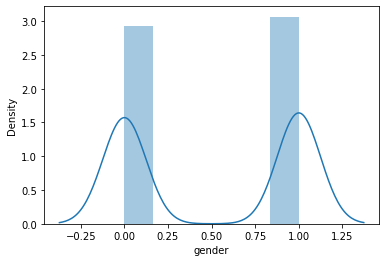

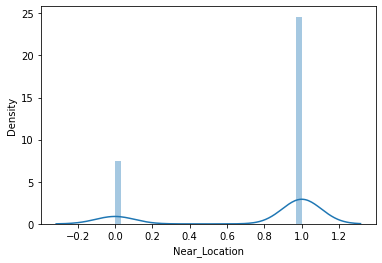

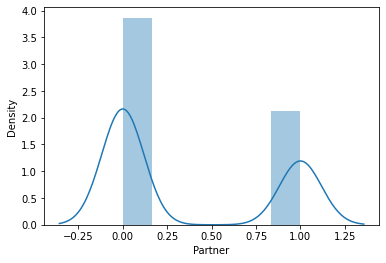

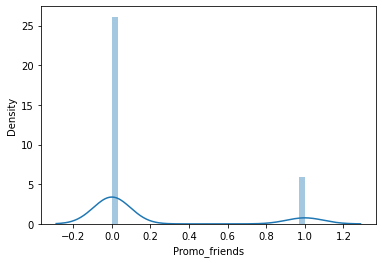

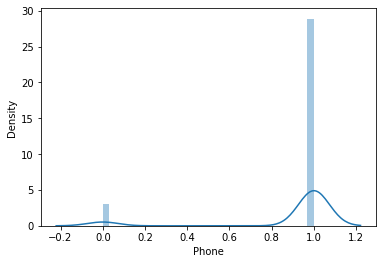

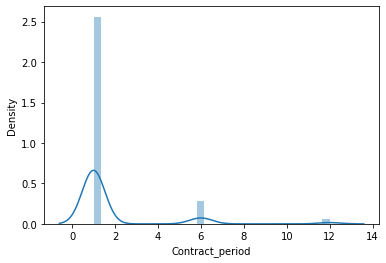

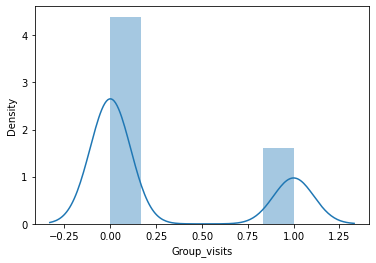

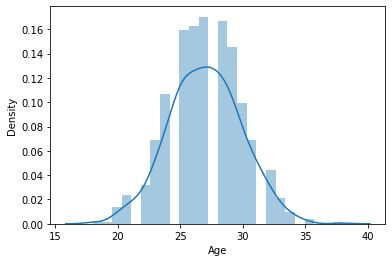

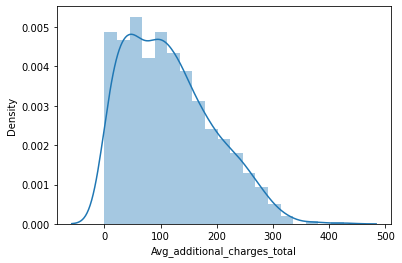

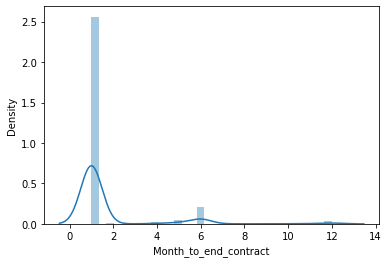

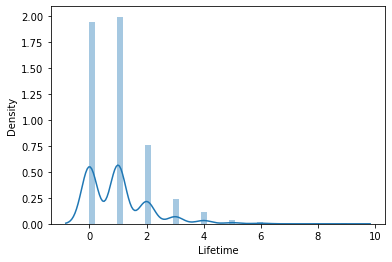

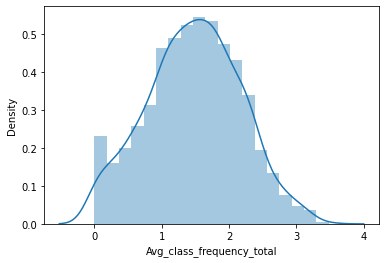

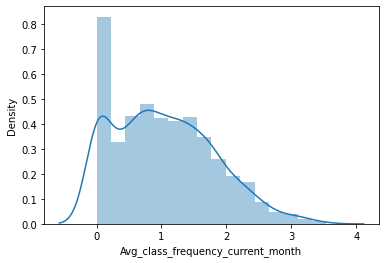

In [12]:
# для тех, кто ушел
for col in data_departed.drop('Churn', axis = 1).columns:
    sns.distplot(data_departed[col]) 
    plt.show()

По средним значениям признаков и по распределению можем описать клиентов тех, кто ушел и тех, кто остался.

Сначала опишем тех, кто остался. Различий по полу практически нет. В основном это те, кто живет или работает рядом с фитнес-центром. Большая часть - это сотрудники компании-партнёра клуба, также те, кто пришел не по промокоду. Номер телефона есть у большинства клиентов. Также у клиентов много месячных абонементов, но и немало полугодовых и годовых. Осталось много тех, у кого до конца абонемента 1, 6, 12 месяцев. На групповые занятия клиенты все же больше не ходят, чем ходят. По возрасту больше тех, кому 28-32 года. Суммарная выручка от других услуг клуба в среднем 159. В среднем клиенты ходят 4 месяца от первого посещения, также посещают зал 1-3 раза в неделю.

Теперь опишем тех, кто ушел. Различий по полу так же нет. Доля тех, кто живет или работает рядом с фитнесом меньше, чем у тех, кто остался. Большая часть - это не сотрудники компании-партнёра клуба, также те, кто пришел не по промокоду. Номер телефона тоже у большинства есть. В основном это клиенты с месячным абонементом, в отличие от оставшихся клиентов, где много тех, у кого срок абонемента выше. На групповые занятия мало кто ходит. Возраст ушедших посетителей фитнес-клуба 25-29 лет. Средняя выручка от других услуг фитнес-клуба ниже и составляет 115. Ушли в основном те, у кого абонемент был на 1 месяц, но также есть часть тех, у кого абонемент был еще на полгода. Ушли в основном самые новые клиенты, которые только походили месяц. Посещали зал они 1-2 раза в неделю и в предыдущий месяц в среднем ходили 1 раз в неделю в зал.

In [13]:
# построим матрицу корреляций
corr = data.corr().style.format('{:.3f}')
corr

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000,0.007,-0.010,-0.005,-0.009,0.001,0.018,0.014,-0.009,-0.001,0.014,0.015,0.009,0.001
Near_Location,0.007,1.000,-0.005,0.211,-0.016,0.150,0.155,0.058,0.041,0.144,0.071,0.043,0.063,-0.128
Partner,-0.010,-0.005,1.000,0.452,0.010,0.306,0.023,0.047,0.023,0.295,0.061,0.025,0.046,-0.158
Promo_friends,-0.005,0.211,0.452,1.000,0.002,0.245,0.120,0.050,0.037,0.240,0.073,0.028,0.054,-0.162
Phone,-0.009,-0.016,0.010,0.002,1.000,-0.007,-0.010,-0.011,0.009,-0.011,-0.019,0.008,0.013,-0.001
Contract_period,0.001,0.150,0.306,0.245,-0.007,1.000,0.170,0.138,0.111,0.973,0.171,0.096,0.159,-0.390
Group_visits,0.018,0.155,0.023,0.120,-0.010,0.170,1.000,0.081,0.032,0.164,0.076,0.057,0.076,-0.175
Age,0.014,0.058,0.047,0.050,-0.011,0.138,0.081,1.000,0.080,0.135,0.165,0.120,0.183,-0.405
Avg_additional_charges_total,-0.009,0.041,0.023,0.037,0.009,0.111,0.032,0.080,1.000,0.114,0.079,0.044,0.080,-0.199
Month_to_end_contract,-0.001,0.144,0.295,0.240,-0.011,0.973,0.164,0.135,0.114,1.000,0.161,0.085,0.148,-0.381


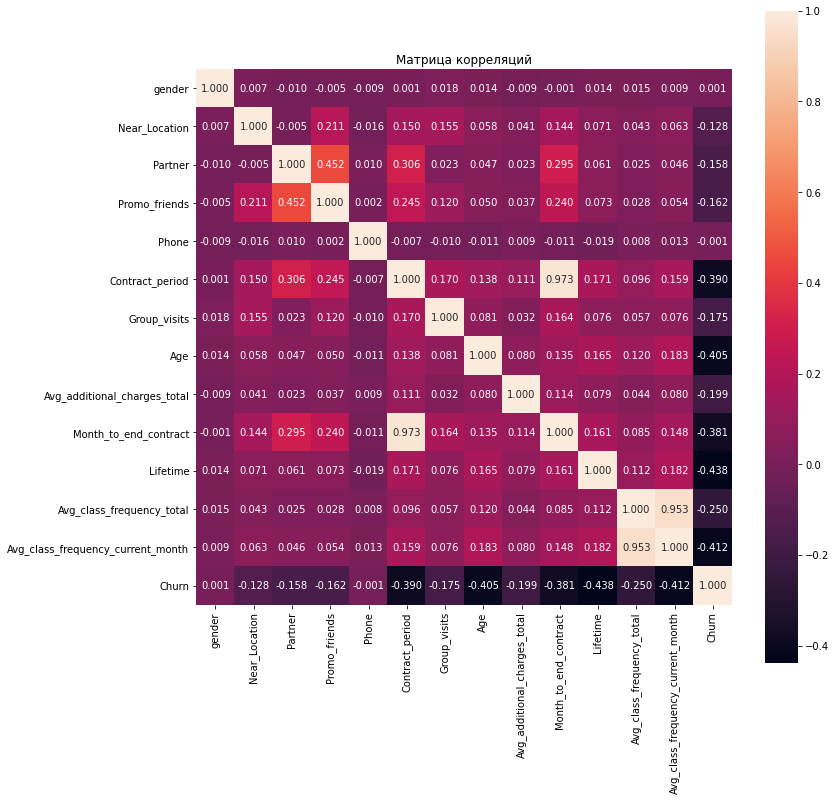

In [14]:
# отобразим матрицу корреляций
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, square=True, fmt=".3f")
plt.title("Матрица корреляций");

По матрице корреляций мы видим, что нет признаков, сильно коррелирующих с целевой переменной. Но есть признаки, коррелирующие с другими признаками Contract_period c Month_to_end_contract, Avg_class_frequency_total c Avg_class_frequency_current_month.

Вывод: Мы провели исследовательский анализ данных. И выявили, что дубликатов и пропусков в данных нет. 
    
Общая характеристика клиентов такая: По полу и наличию/отсутствию сотрудника компании-партнера особых различий нет, в основном в зал ходят те, кто живет или работает рядом с ним, по промокоду «приведи друга» приходит меньше людей, чем без промокода, меньше чем у 500 людей из 4000 нет информации о контактном телефоне, по возрасту клиенты в основном 26-32 лет, больше всего клиентов с месячным абонементом, на групповые занятия ходит меньше людей, чем не ходит, большая часть клиентов платит суммарно за другие услуги фитнес-центра в среднем 147, также в среднем в спортзал клиенты ходят 2 раза в неделю, ушедших клиентов в этом месяце чуть больше 1000. Новых клиентов больше всего среди всех.

Разделили клиентов на тех, кто ушел и тех, кто остался. Вот их характеристика:

Те, кто остался: Различий по полу практически нет. В основном это те, кто живет или работает рядом с фитнес-центром. Большая часть - это сотрудники компании-партнёра клуба, также те, кто пришел не по промокоду. Номер телефона есть у большинства клиентов. Также у клиентов много месячных абонементов, но и немало полугодовых и годовых. Осталось много тех, у кого до конца абонемента 1, 6, 12 месяцев. На групповые занятия клиенты все же больше не ходят, чем ходят. По возрасту больше тех, кому 28-32 года. Суммарная выручка от других услуг клуба в среднем 159. В среднем клиенты ходят 4 месяца от первого посещения, также посещают зал 1-3 раза в неделю.
Те, кто ушел: Различий по полу так же нет. Доля тех, кто живет или работает рядом с фитнесом меньше, чем у тех, кто остался. Большая часть - это не сотрудники компании-партнёра клуба, также те, кто пришел не по промокоду. Номер телефона тоже у большинства есть. В основном это клиенты с месячным абонементом, в отличие от оставшихся клиентов, где много тех, у кого срок абонемента выше. На групповые занятия мало кто ходит. Возраст ушедших посетителей фитнес-клуба 25-29 лет. Средняя выручка от других услуг фитнес-клуба ниже и составляет 115. Ушли в основном те, у кого абонемент был на 1 месяц, но также есть часть тех, у кого абонемент был еще на полгода. Ушли в основном самые новые клиенты, которые только походили месяц. Посещали зал они 1-2 раза в неделю и в предыдущий месяц в среднем ходили 1 раз в неделю в зал.

Еще мы построили матрицу корреляций и выяснили, что нет признаков, сильно коррелирующих с целевой переменной. Но есть признаки, коррелирующие с другими признаками Contract_period c Month_to_end_contract, Avg_class_frequency_total c Avg_class_frequency_current_month.

## Создание модели прогнозирования оттока клиентов

In [15]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns = ['Churn'])
y = data['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # разделим модель на обучающую и валидационную выборку

In [17]:
scaler = StandardScaler()# создадим объект класса StandardScaler и применим его к обучающей выборке

In [18]:
X_train_st = scaler.fit_transform(X_train)# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

In [19]:
X_test_st = scaler.transform(X_test)# применяем стандартизацию к матрице признаков для тестовой выборки

In [20]:
# зададим список моделей
models = [
    LogisticRegression(random_state=0, solver='liblinear'),
    RandomForestClassifier(random_state=0)
]

In [21]:
# напишем функцию, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'ACCURACY:{:.2f} PRECISION:{:.2f} RECALL:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [22]:
# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0, solver='liblinear')
ACCURACY:0.92 PRECISION:0.85 RECALL:0.83
RandomForestClassifier(random_state=0)
ACCURACY:0.92 PRECISION:0.84 RECALL:0.81


Вывод: Модель логистической регрессии показала себя лучше, чем модель случайного леса, так как метрики precision и recall лучше у логистической регрессии, а accuracy у них одинаковая.

## Кластеризация клиентов

In [23]:
x_sc = scaler.fit_transform(X)# стандартизируем данные

In [24]:
linked = linkage(x_sc, method = 'ward')# в переменной linked сохраним таблицу «связок» между объектами

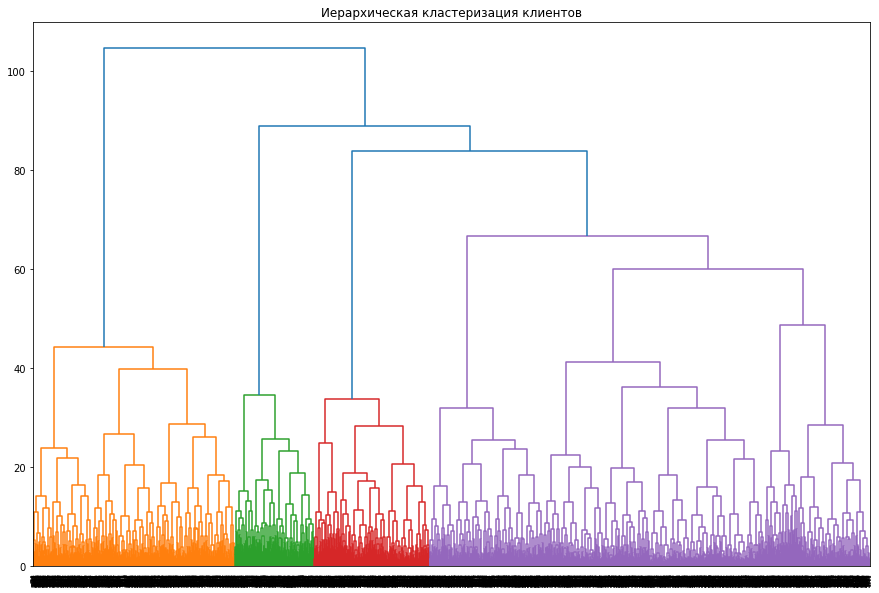

In [25]:
# таблицу «связок» визуализируем как дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show() 

На графике видно 5 кластеров.

In [26]:
km = KMeans(n_clusters=5, random_state=0)# зададим модель k_means с числом кластеров 5 и фиксируем значение random_state

In [27]:
labels = km.fit_predict(x_sc)# применим алгоритм к данным и сформируем вектор кластеров 

In [28]:
data['cluster_km'] = labels# сохраним метки кластера в поле нашего датасета

In [29]:
data.drop(columns = ['Churn']).groupby(by='cluster_km').agg('mean')# посмотрим на средние значения признаков для кластеров

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161


Кластеры различаются по средним значениям признаков. Ниже построим распределения признаков для кластеров и напишем вывод по ним.

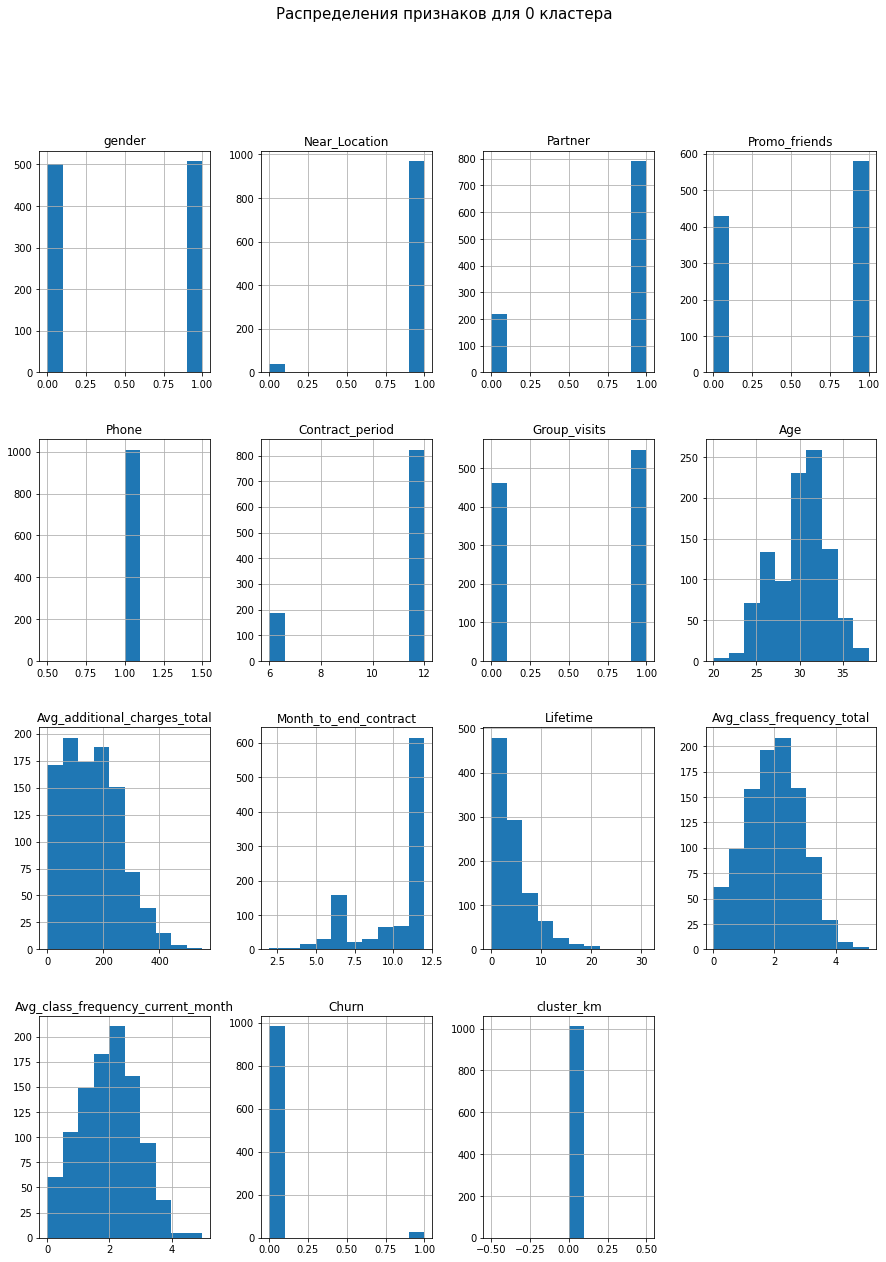

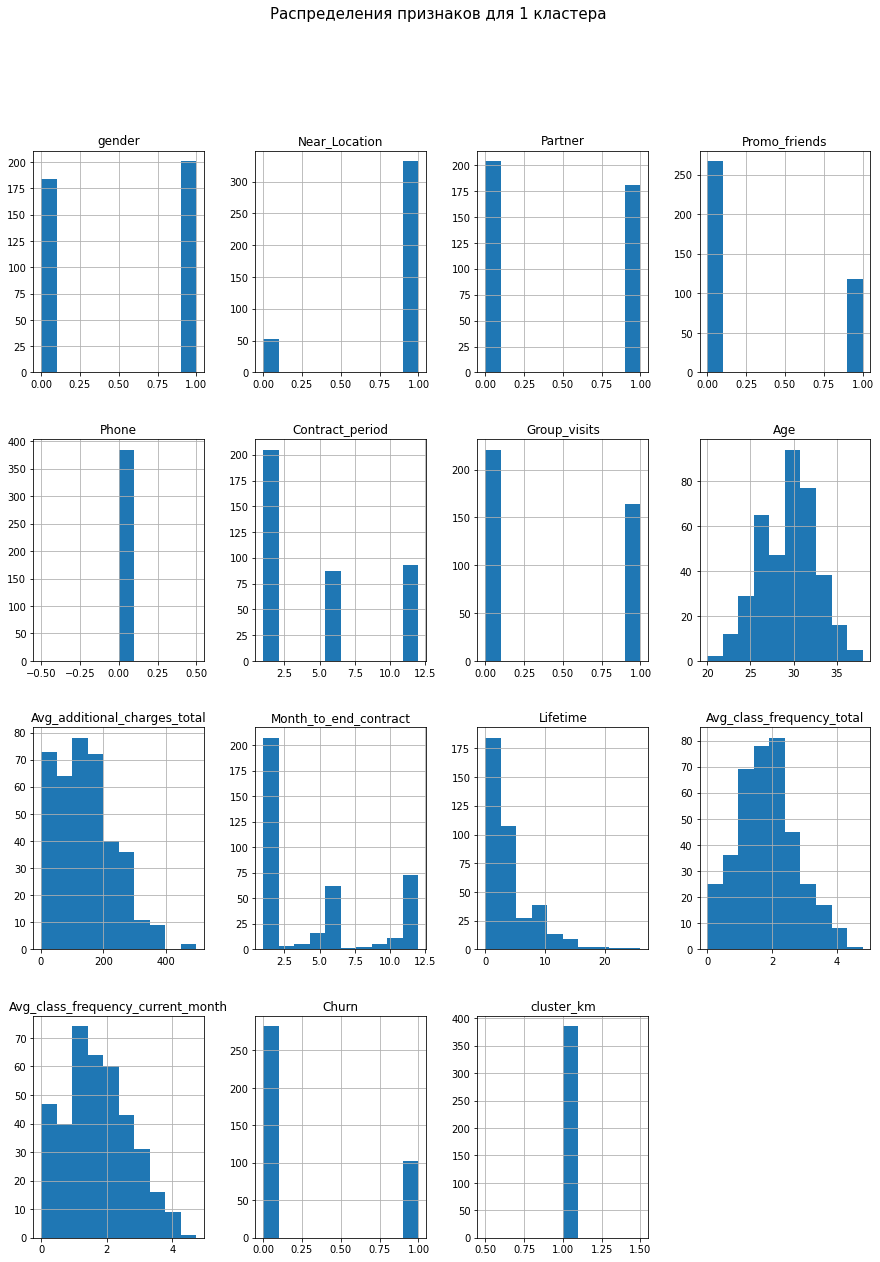

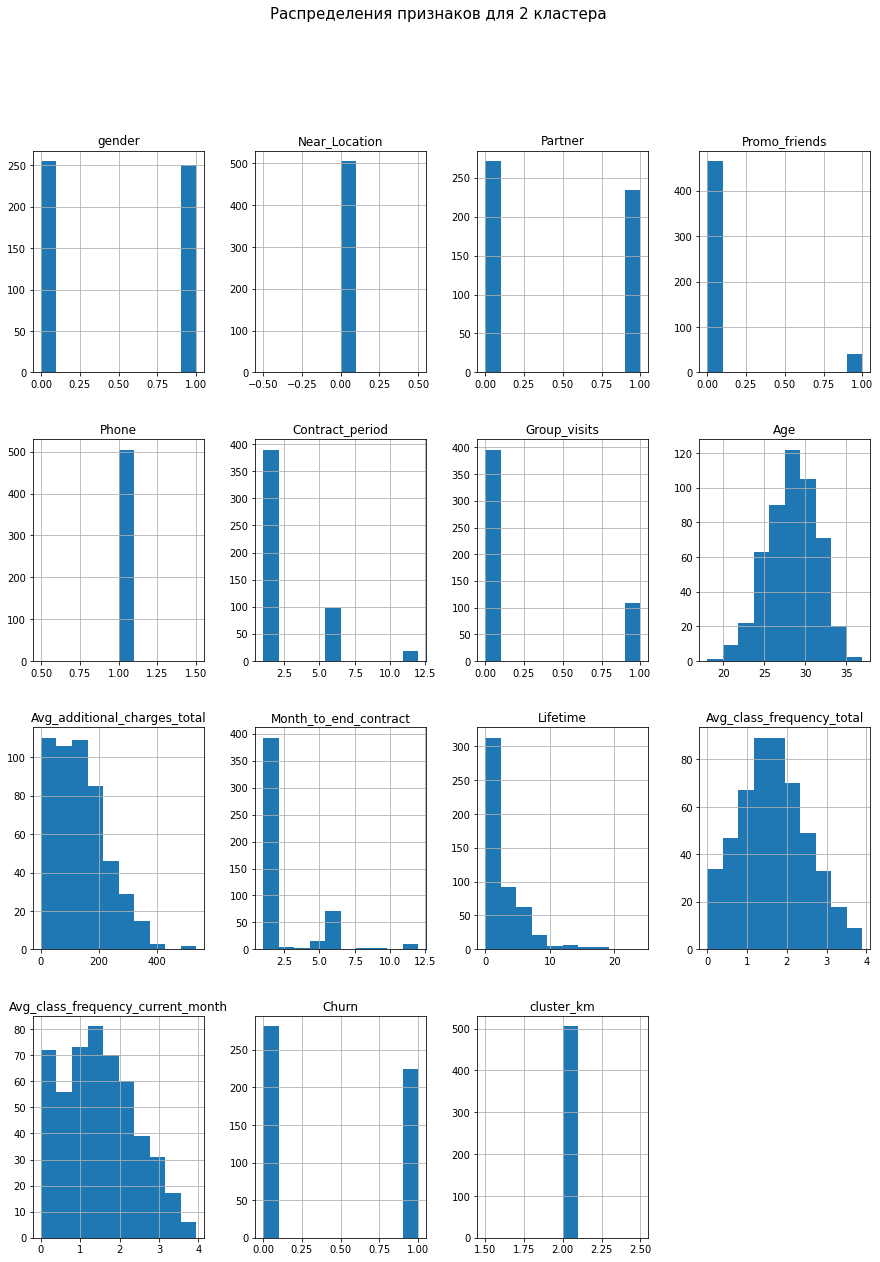

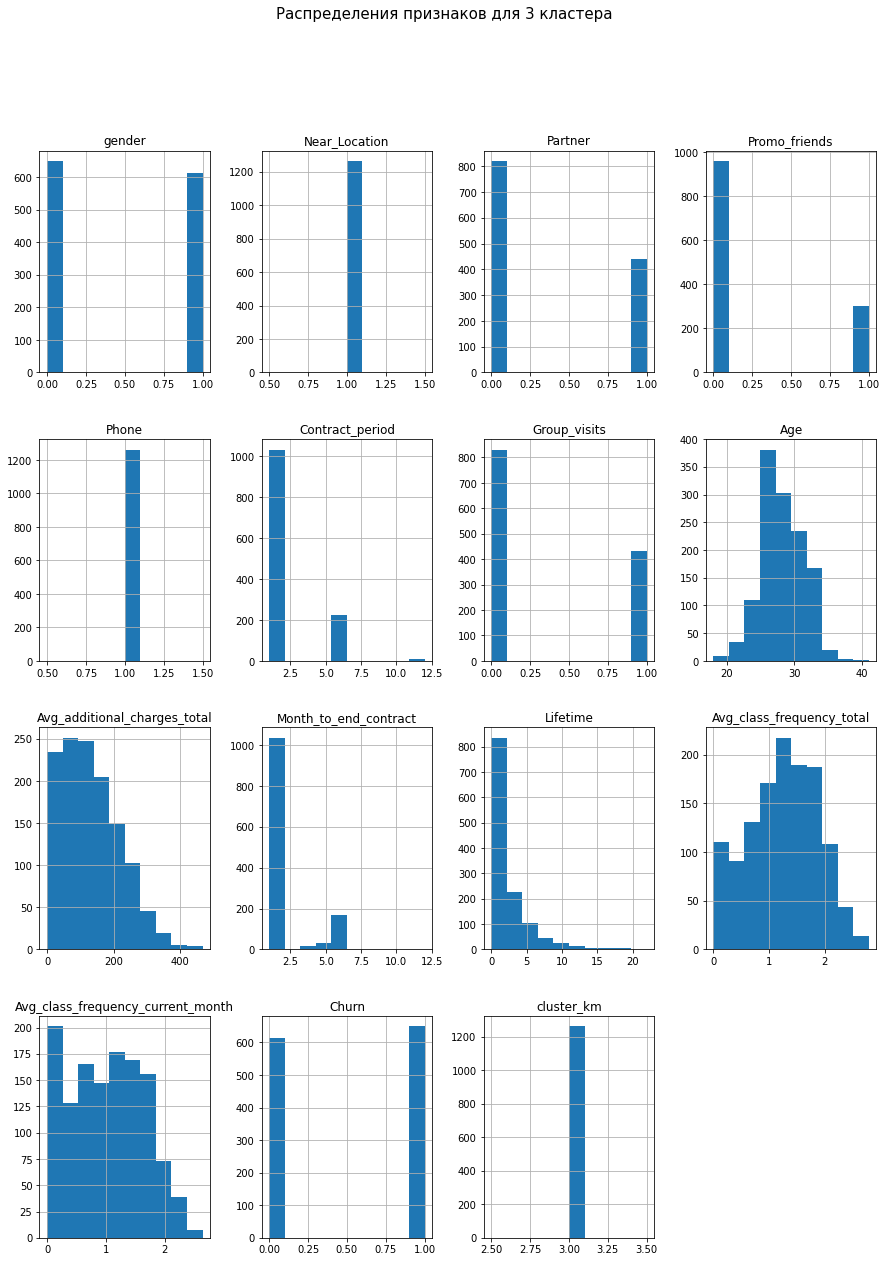

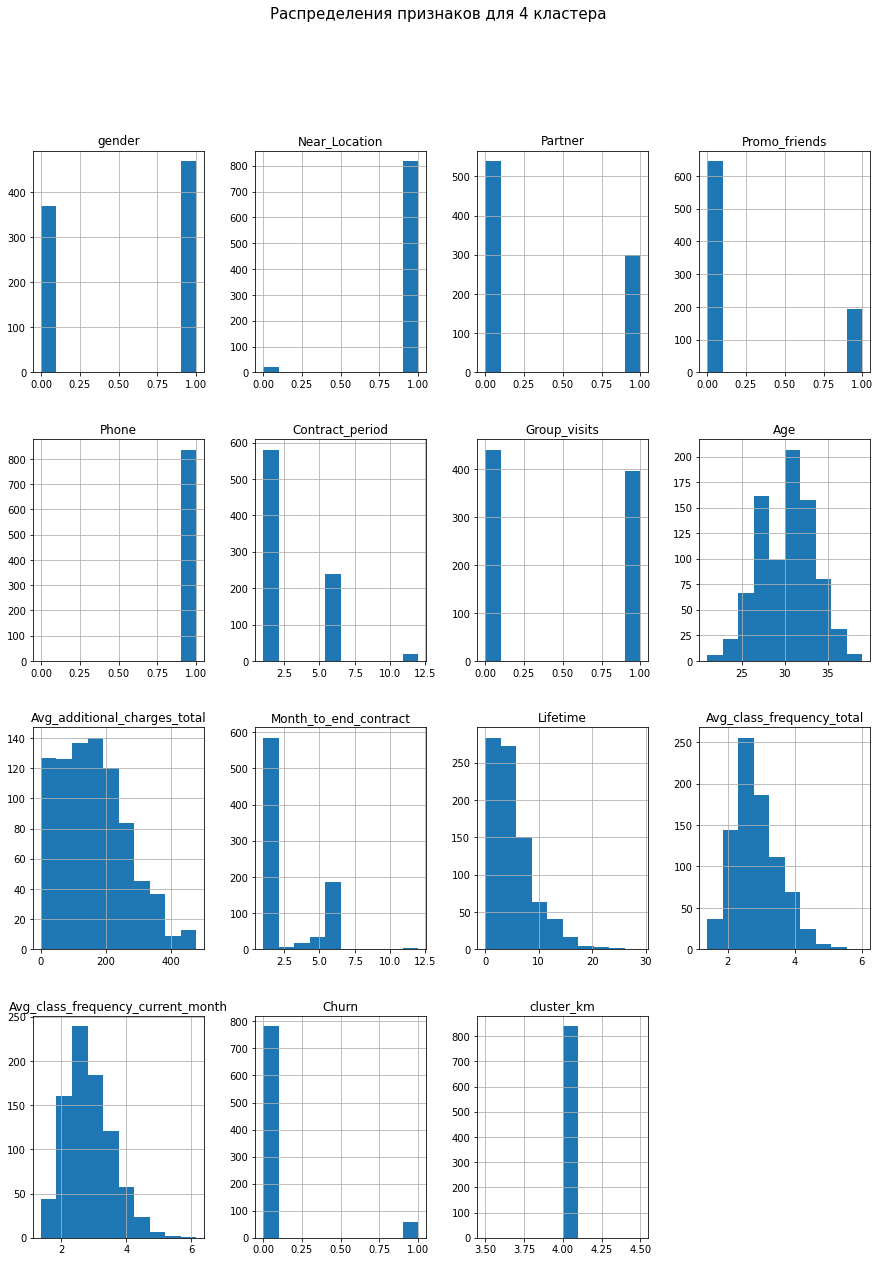

In [30]:
# построим распределения признаков для кластеров
for val in [0, 1, 2, 3, 4]:
    data[data['cluster_km'] == val].hist(figsize=(15,20))
    plt.suptitle('Распределения признаков для {} кластера'.format(val), fontsize=15)
    plt.show()

In [31]:
data.groupby(by='cluster_km').agg({'Churn':'mean'}).style.format('{:.3f}')# для каждого полученного кластера посчитаем долю оттока

,Churn
cluster_km,
0,0.028
1,0.268
2,0.444
3,0.514
4,0.068


Вывод: По полу во всех кластерах особых различий нет. 

В 0 кластере отток в 3%. В нем находятся клиенты, которые живут или работают в районе, где находится фитнес-центр. Сотрудников компаний-партнеров 78%. Многие люди в этом кластере были приглашены друзьями и доля таких людей больше, чем в других кластерах. Длительность действующего абонемента в среднем 11 месяцев. Чуть больше 50% клиентов этого кластера посещают групповые занятия. Средний возраст клиентов 30 лет. В среднем 160 рублей они тратят на другие услуги клуба. Большинство из них 1-5 месяцев ходят в зал от первого посещения, 1-3 раза в неделю за все время посещают комплекс. Номер телефона указан у всех.

В 1 кластере отток в 27%. В нем в основном находятся клиенты, которые живут или работают в районе, где находится фитнес-центр, но их доля меньше, чем в 0 кластере. Также почти половина из них - сотрудники компаний-партнеров. 30% клиентов были приглашены друзьями и 43% посещают групповые занятия. Средняя длительность абонемента 5 месяцев. Средний возраст людей - 29-30 лет. Клиенты этого кластера тратят на иные услуги клуба в среднем 144 рубля. Большинство из них 1-3 месяца ходят в зал от первого посещения, 1-3 раза в неделю за все время посещают комплекс. Номер телефона ни у кого не указан.

Во 2 кластере отток выше, чем в предыдущих кластерах и он составляет 44%. В нем находятся клиенты, которые не живут или не работают в районе, где находится фитнес-центр. У них и абонементы короче (в среднем 2-3 месяца) , чем в кластерах выше и посещают спортзал они тоже меньше по времени в основном 1-2 раза в неделю. Средний возраст 28-29 лет. И сотрудников компаний-партнеров здесь меньше, чем в 0 и 1 кластере (46%). Приглашенных друзьями здесь почти нет. Групповые посещения составляют 22%. Номер телефона указан у всех. Тратят на другие услуги в среднем - 135.

В 3 кластере находятся люди только те, кто работает или проживает рядом с залом. В этом кластере выше всего отток 51%. Сотрудников компаний-партнеров здесь 35%, приглашенных друзьями 24%, текущие абонементы  у них в среднем на 1-2 месяца и групповые посещения 34%. Возраст в среднем 28 лет. Тратят на другие услуги в среднем 132. Большинство ходит в зал от начала 1-2 месяца, посещают его 1-2 раза в неделю, а за последний месяц есть много тех, кто вообще зал не посещал. Номер телефона указан у всех.

В 4 кластере отток в 6,9%. В нем клиенты в основном, которые работают или проживают рядом с залом. Сотрудников компаний-партнеров здесь 36%. 23% клиентов были приглашены друзьями и около 50% посещают групповые занятия. Средняя длительность абонемента 2-3 месяца. Средний возраст людей - 30 лет. Ходят в зал от начала 1-7 месяцев (большинство), посещают его 2-3 раза в неделю. Номер телефона указан почти у всех. Тратят на другие услуги в среднем - 162.

## Выводы и базовые рекомендации по работе с клиентами

Самый сильный отток наблюдается в 2 и 3 кластерах. 44% и 51% соответственно.

На отток клиентов влияет:

1. Месторасположение фитнес-клуба, это особенно заметно по 2 кластеру, в котором нет клиентов проживающих или работающих рядом с залом.
2. Отсутствие партнерства. Доля сотрудников компаний-партнеров в кластерах с оттоком не сильно высокая 35-47%.
3. Покупка преимущественно коротких абонементов.
4. Недолгое нахождение в зале.
5. Невысокий интерес к групповым занятиям. Доля клиентов, посещающих групповые занятия в кластерах с наименьшим оттоком, выше.
6. Отсуствие друга/знакомого, посещающего этот же зал. Есть высокая доля клиентов в кластерах без высокого оттока,  задержавшихся, имея приглашение от друга/знакомого. 

Рекомендации по удержанию клиентов:

1. Можно ввести скидки на продление абонементов (на 3 и более месяцев), где стоимость одного занятия выходит ниже, чем в абонементе на месяц.
2. Ввести напоминание о продлении абонемента: оповещение администратором клиентам, sms-оповещения, уведомление в приложении, рассылка по почте.
3. Добавить акции в честь праздников (День Рождения, Новый год).
4. Ведение социальных сетей. Создавать контент, способный удерживать внимание аудитории. Три основных типа контента – это видео с красивыми движениями, процессы тренировок и результаты учеников. Также подробно рассказывать о групповых занятиях, чтобы привлечь еще больше занимающихся. Проводить розыгрыши абонементов.
5. Компенсация половины стоимости занятия при пропуске.
6. Проводить мероприятия (фотосессии, марафоны).
7. Поставить мини-кухню, где клиенты смогли бы брать воду, чай, кофе.
8. Дополнительно можно ввести бесплатные средства гигиены.
9. Реализовать фитнес обучения для тренеров. Чтобы клиенты оставались, нужен хороший тренер, который сможет удовлетворить их потребности, поможет прийти к реальным результатам.
10. Ввести подарочные карты или книги в качестве награды за достижение цели клиента.
11. Самим пользоваться периодически услугами своего клуба, чтобы понимать, что необходимо улучшить, добавить, изменить, потому что важно делать сервис лучшим.